# Predicting Airline Passenger Satisfation with help of ML

With the help of various python based machine learning and data science tools we're going to analyse and train the data. Then we'll make an attempt to build a machine learning model based on our information. The ML model will help us to predict whether a passenger is satisfied with the airline service or not. 

## Steps we're going to follow-

1. Defining Problem
2. Briefing about Data
3. Importing Data
4. Data Exploration
5. Data Summarisation
6. Modelling
7. Experimentation & Evaluation
8. Conclusion & References

# 1. Defining Problem

Given the airline passenger satisfaction survey information about the passengers, can we predict whether they are satisfies or not with the airline services ? Also what factors are highly correlated to a satisfied (or dissatisfied) passenger?

# 2. Briefing about Data

### 2.1 What does this data contains?

The Airline Passenger Satisfaction folder comes with two csv files, `train.csv` and `test.csv`.

The datasets contains 23 different attributes about an airline passenger satisfaction survey. All these attributes gives us useful information about the passengers and how they rated the diffferent services of the flights.

What factors lead to customer satisfaction for an Airline?

### 2.2 Where do we get the data from?

We got this open dataset from Kaggle Datasets.

Link: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction 

### 2.3 What information do we get from this data?

The datasets contains 23 different attributes which are -

1. Gender: Gender of the passengers 
    * Male : Male Passenger
    * Female : Female Passenger
2. Customer Type: The customer type as per loyality and behaviour
    * Loyal Customer
    * Disloyal Customer
3. Age: The actual age of the passengers
    * In Range
4. Type of Travel: Purpose of the flight of the passengers
    * Personal Travel
    * Business Travel
5. Class: Travel class in the plane of the passengers
    * Eco : Economy Class
    * Eco Plus : Premium Economy Class
    * Business : Business Class
6. Flight distance: The flight distance of this journey
7. Inflight wifi service: Satisfaction level of the inflight wifi service
    * 0 : Not Applicable
    * General Rating: 1-5
8. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
    * 0 : Not Applicable
    * General Rating: 1-5
9. Ease of Online booking: Satisfaction level of online booking
    * 0 : Not Applicable
    * General Rating: 1-5
10. Gate location: Satisfaction level of Gate location
    * 0 : Not Applicable
    * General Rating: 1-5
11. Food and drink: Satisfaction level of Food and drink
    * 0 : Not Applicable
    * General Rating: 1-5
12. Online boarding: Satisfaction level of online boarding
    * 0 : Not Applicable
    * General Rating: 1-5
13. Seat comfort: Satisfaction level of Seat comfort
    * 0 : Not Applicable
    * General Rating: 1-5
14. Inflight entertainment: Satisfaction level of inflight entertainment
    * 0 : Not Applicable
    * General Rating: 1-5
15. On-board service: Satisfaction level of On-board service
    * 0 : Not Applicable
    * General Rating: 1-5
16. Leg room service: Satisfaction level of Leg room service
    * 0 : Not Applicable
    * General Rating: 1-5
17. Baggage handling: Satisfaction level of baggage handling
    * 0 : Not Applicable
    * General Rating: 1-5
18. Check-in service: Satisfaction level of Check-in service
    * 0 : Not Applicable
    * General Rating: 1-5
19. Inflight service: Satisfaction level of inflight service
20. Cleanliness: Satisfaction level of Cleanliness
    * 0 : Not Applicable
    * General Rating: 1-5
21. Departure Delay in Minutes: Minutes delayed when departure
    * In Continous Range (Minutes)
22. Arrival Delay in Minutes: Minutes delayed when Arrival
    * In Continous Range (Minutes)
23. Satisfaction: Airline satisfaction level ( Prediction Target )
    * Satisfaction (1) : Overall satisfied with the services
    * Neutral or Dissatisfaction (0) : Overall unsatisfied with the services


### 2.4 Evaluation Criteria ?

If we can reach up to 95% accuracy at predicting whether or not a customer is satisfied with the airline services, then only we'll pursue for further application purpose.

1. Confusion Matrix
2. Classification Report
3. ROC Curve and AUC Value
4. Cross Validated Scores

### 2.5 Any another infomation ?

Modules we are going to use : Pandas, Numpy, Plotly, Matplotlib, Seaborn, Jovian, Joblib, XGBoost, Scikit-Learn.

In [1]:
# !pip install pandas, numpy, plotly, matplotlib, seaborn, jovian, joblib, xgboost, scikit-learn --q

# 3. Importing Data

In this section we are going to import our basic required files and modules which need for Exploratory Data Analysis and further Data Pre-processing.

### 3.1 Importing Basic Libraries

We'll start with basic Python Modules like Pandas, Numpy, Plotly, Matplotlib, Seaborn, and Jovian.

In [2]:
# Importing the modules

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import jovian
%matplotlib inline

### 3.2 Importing Datasets

Before importing the datsets we have to download the availbale data from the source, for our case its Kaggle dataset. 

1. We can directly download it with the help of `open datesets` module and load it with `os` module.
2. Or we can directly download the data offline and load it with `pandas` module.

In [3]:
raw_df = pd.read_csv('train.csv')  # Loading the dataset

In [4]:
raw_df.head()  # Checking first 5 rows

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [5]:
raw_df.head().T  # Transposing the dataframe for better view

0  \
Unnamed: 0                                               0   
id                                                   70172   
Gender                                                Male   
Customer Type                               Loyal Customer   
Age                                                     13   
Type of Travel                             Personal Travel   
Class                                             Eco Plus   
Flight Distance                                        460   
Inflight wifi service                                    3   
Departure/Arrival time convenient                        4   
Ease of Online booking                                   3   
Gate location                                            1   
Food and drink                                           5   
Online boarding                                          3   
Seat comfort                                             5   
Inflight entertainment                                   5   
On-board service                                         4   
Leg room service                                         3   
Baggage handling                                         4   
Checkin service                                          4   
Inflight service                                         5   
Cleanliness                                              5   
Departure Delay in Minutes                              25   
Arrival Delay in Minutes                              18.0   
satisfaction                       neutral or dissatisfied   

                                                         1                2  \
Unnamed: 0                                               1                2   
id                                                    5047           110028   
Gender                                                Male           Female   
Customer Type                            disloyal Customer   Loyal Customer   
Age                                                     25               26   
Type of Travel                             Business travel  Business travel   
Class                                             Business         Business   
Flight Distance                                        235             1142   
Inflight wifi service                                    3                2   
Departure/Arrival time convenient                        2                2   
Ease of Online booking                                   3                2   
Gate location                                            3                2   
Food and drink                                           1                5   
Online boarding                                          3                5   
Seat comfort                                             1                5   
Inflight entertainment                                   1                5   
On-board service                                         1                4   
Leg room service                                         5                3   
Baggage handling                                         3                4   
Checkin service                                          1                4   
Inflight service                                         4                4   
Cleanliness                                              1                5   
Departure Delay in Minutes                               1                0   
Arrival Delay in Minutes                               6.0              0.0   
satisfaction                       neutral or dissatisfied        satisfied   

                                                         3                4  
Unnamed: 0                                               3                4  
id                                                   24026           119299  
Gender                                              Female             Male  
Customer Type                               Loyal Customer   Loyal Customer  

**Quich Note:** By transposiong the dataset we are able to get much better view of the rows and columns. We can use such type of transpose function when there are more number of columns that we can see in the window screen.

# 4. Data Exploration

In this section we are going to explore and get useful insights about our dataset. By exploring the distributions of various columns we can see how they are related to the target column. Finally along with exploring the dataset, we can try visualising the different columns and can get better grasp about its variablility. 

## 4.1 General Information about Dataset

- Dataset Shape
- Columns Information
- Missing values
- Statistical Information
- Unique Values

In [6]:
# Shape of our dataset

raw_df.shape

(103904, 25)

Note: Our training dataset contains 103904 rows od data and 25 columns.

In [7]:
# Basic infor about dataset

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
# Check for NA or missing values

raw_df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [9]:
# Check for number of unique values

raw_df.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [10]:
# Statistical Information

raw_df.describe().T

count          mean           std   min  \
Unnamed: 0                         103904.0  51951.500000  29994.645522   0.0   
id                                 103904.0  64924.210502  37463.812252   1.0   
Age                                103904.0     39.379706     15.114964   7.0   
Flight Distance                    103904.0   1189.448375    997.147281  31.0   
Inflight wifi service              103904.0      2.729683      1.327829   0.0   
Departure/Arrival time convenient  103904.0      3.060296      1.525075   0.0   
Ease of Online booking             103904.0      2.756901      1.398929   0.0   
Gate location                      103904.0      2.976883      1.277621   0.0   
Food and drink                     103904.0      3.202129      1.329533   0.0   
Online boarding                    103904.0      3.250375      1.349509   0.0   
Seat comfort                       103904.0      3.439396      1.319088   0.0   
Inflight entertainment             103904.0      3.358158      1.332991   0.0   
On-board service                   103904.0      3.382363      1.288354   0.0   
Leg room service                   103904.0      3.351055      1.315605   0.0   
Baggage handling                   103904.0      3.631833      1.180903   1.0   
Checkin service                    103904.0      3.304290      1.265396   0.0   
Inflight service                   103904.0      3.640428      1.175663   0.0   
Cleanliness                        103904.0      3.286351      1.312273   0.0   
Departure Delay in Minutes         103904.0     14.815618     38.230901   0.0   
Arrival Delay in Minutes           103594.0     15.178678     38.698682   0.0   

                                        25%      50%       75%       max  
Unnamed: 0                         25975.75  51951.5  77927.25  103903.0  
id                                 32533.75  64856.5  97368.25  129880.0  
Age                                   27.00     40.0     51.00      85.0  
Flight Distance                      414.00    843.0   1743.00    4983.0  
Inflight wifi service                  2.00      3.0      4.00       5.0  
Departure/Arrival time convenient      2.00      3.0      4.00       5.0  
Ease of Online booking                 2.00      3.0      4.00       5.0  
Gate location                          2.00      3.0      4.00       5.0  
Food and drink                         2.00      3.0      4.00       5.0  
Online boarding                        2.00      3.0      4.00       5.0  
Seat comfort                           2.00      4.0      5.00       5.0  
Inflight entertainment                 2.00      4.0      4.00       5.0  
On-board service                       2.00      4.0      4.00       5.0  
Leg room service                       2.00      4.0      4.00       5.0  
Baggage handling                       3.00      4.0      5.00       5.0  
Checkin service                        3.00      3.0      4.00       5.0  
Inflight service                       3.00      4.0      5.00       5.0  
Cleanliness                            2.00      3.0      4.00       5.0  
Departure Delay in Minutes             0.00      0.0     12.00    1592.0  
Arrival Delay in Minutes               0.00      0.0     13.00    1584.0

Here we can see some basic statistical information about our passenges and their flight details:

1. The average age of the passengers is 39, where the minimum age being 7 and maximum 85.
2. The average flight travel distance  is 1189 miles, where the minimum age being 31 and maximum 4893.
3. The mean values for the customer input categories are either 2 or 3.  

## 4.2 Visulaistion and Finding Patterns

In [11]:
# Visualisation Setup

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [12]:
# How many of each class are there in target column?
raw_df["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [13]:
# Visualising the satisfation distribution among passengers

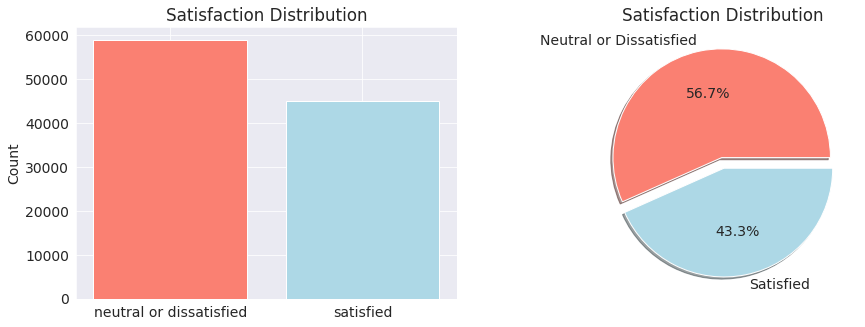

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

# Plot 1
ax1.bar(raw_df["satisfaction"].value_counts().index, raw_df["satisfaction"].value_counts(),color=["salmon", "lightblue"])
ax1.set(title="Satisfaction Distribution",ylabel="Count")

# Plot 2
ax2.pie(raw_df["satisfaction"].value_counts(),colors=["salmon", "lightblue"],
        labels= ["Neutral or Dissatisfied", "Satisfied"] , 
        autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=0, shadow = True)
ax2.set(title="Satisfaction Distribution");

### 1. Customer Satisfaction Ratio with respect to Sex

In [15]:
# Sex ratio of Male and Female

raw_df['Gender'].value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [16]:
# Compare target column with sex column

pd.crosstab(raw_df['Gender'], raw_df['satisfaction'])

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                          30193      22534
Male                            28686      22491

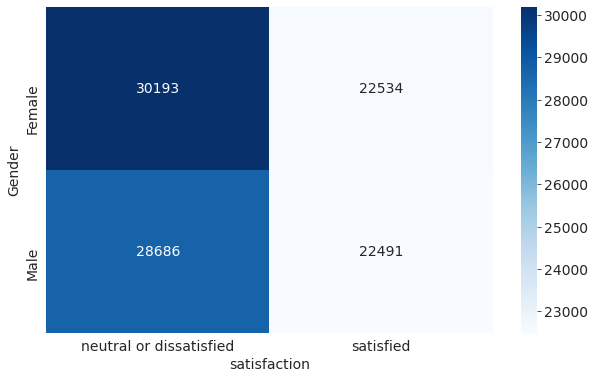

In [17]:
# Visualise this crosstabulated data

sns.heatmap(pd.crosstab(raw_df['Gender'], raw_df['satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

In [18]:
# Check the percentages

pd.crosstab(raw_df['Gender'], raw_df['satisfaction'], normalize=True)*100

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                      29.058554  21.687327
Male                        27.608177  21.645942

* Here we can see that around 57% of passengers are not satisfied with the services.

### 2. Customer Satisfaction Ratio with respect to Customer Type

In [19]:
# Customer Type Ratio

raw_df['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [20]:
# Crosstab Data

pd.crosstab(raw_df['Customer Type'], raw_df['satisfaction'])

satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                       44390      40533
disloyal Customer                    14489       4492

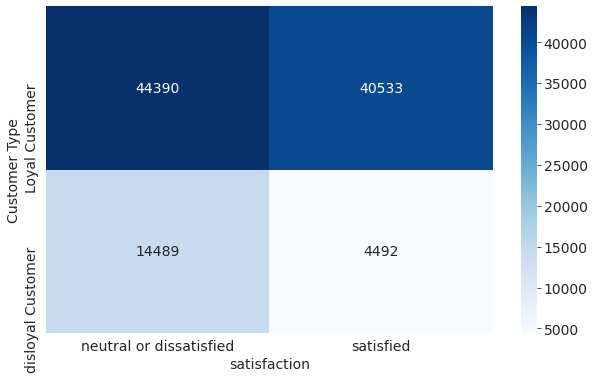

In [21]:
# Visualise this crosstabulated data

sns.heatmap(pd.crosstab(raw_df['Customer Type'], raw_df['satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

In [22]:
# Check the percentages

pd.crosstab(raw_df['Customer Type'], raw_df['satisfaction'], normalize=True)*100

satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                   42.722128  39.010048
disloyal Customer                13.944603   4.323221

* Here we can see that around 82% of the customers are Loyal Customers out of which more than 50% are not satisfied with the services.

### 3. Customer Satisfaction variation with respect to Age

In [23]:
px.histogram(raw_df, 
             x='Age', 
             title='Age vs Satisfaction Ratio',
             marginal='box',
             color='satisfaction')

* Here we can see that most of data is distributed normally and has very few outliers.

### 4. Customer Satisfaction variation with respect to Type of Travel

In [24]:
# Type of Travel Ratio

raw_df['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

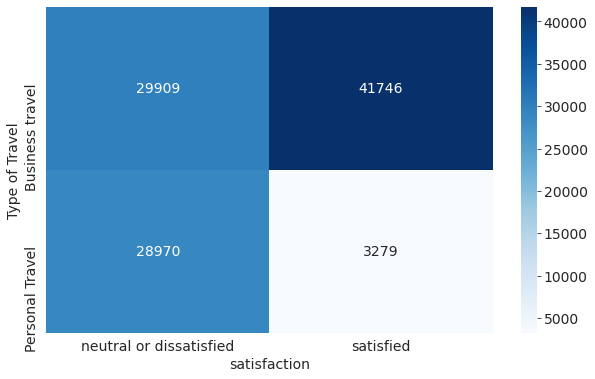

In [25]:
# Visualise this crosstab data

sns.heatmap(pd.crosstab(raw_df['Type of Travel'], raw_df['satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

In [26]:
# Check the percentages

pd.crosstab(raw_df['Type of Travel'], raw_df['satisfaction'], normalize=True)*100

satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                28.785225  40.177472
Personal Travel                27.881506   3.155798

* Here we can notice that 69% of travel was done for Business out of which 40% of the customers were satisfied.
* Most of the customer (90%) travelling for personal travel are unsatisfied with the services.

### 5. Customer Satisfaction variation with respect to Class

In [27]:
# Type of Class Ratio

raw_df['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

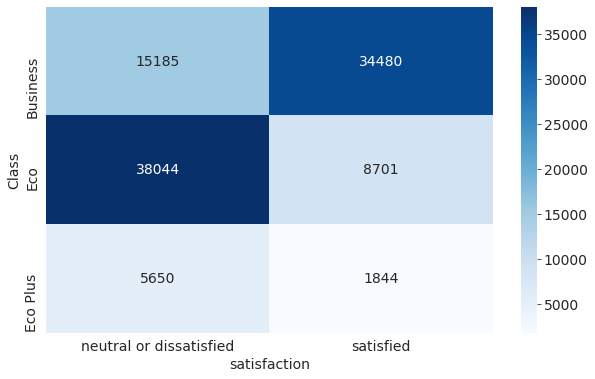

In [28]:
# Visualise this crosstab data

sns.heatmap(pd.crosstab(raw_df['Class'], raw_df['satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

In [29]:
# Check the percentages

pd.crosstab(raw_df['Class'], raw_df['satisfaction'], normalize=True)*100

satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                    14.614452  33.184478
Eco                         36.614567   8.374076
Eco Plus                     5.437712   1.774715

* 50% passengers belong to Business Class, 50% belongs to Eco and Eco Plus Class.
* Majorlity of the customers belonging to Eco and Eco Plus are not satisfied with the services.
* However majority of the customers from Business Class are satisfied with the services.

### 6. Customer Satisfaction variation with respect to Customer Input

In [30]:
customer_input_list = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

In [31]:
def plot_func(a,b):
    for category in customer_input_list[a:b]:
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        sns.countplot(x=raw_df[category],palette="Pastel1")

        plt.subplot(1,2,2)
        sns.countplot(x=raw_df[category],hue=raw_df['satisfaction'], palette='Blues')
        plt.show()

**6.1 For first three category**

1. Inflight wifi service
2. Departure/Arrival time convenient
3. Ease of Online booking
4. Gate location

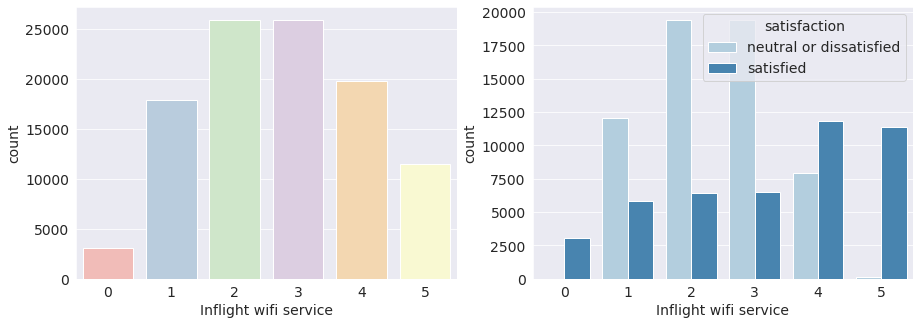

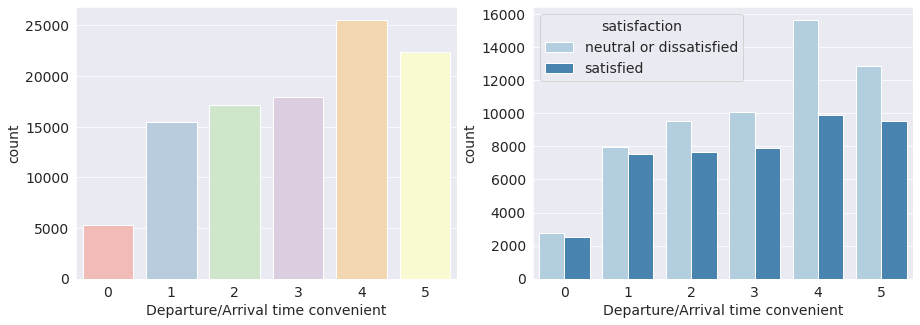

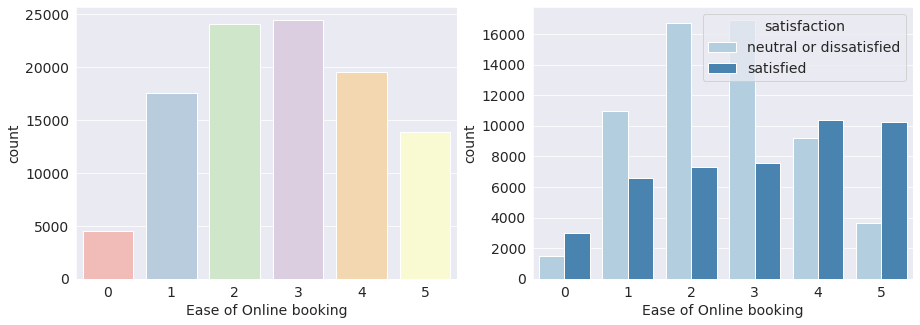

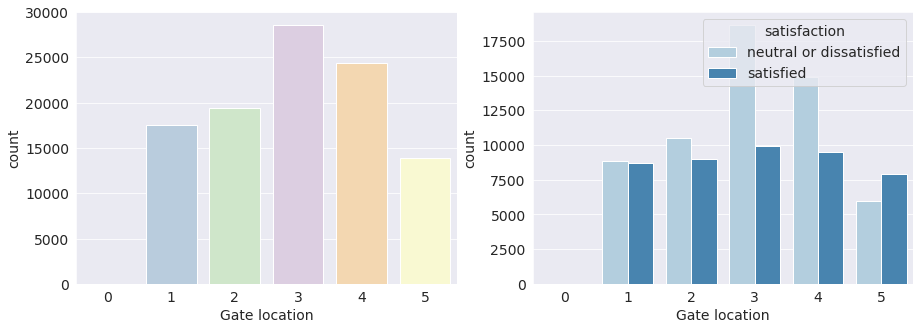

In [32]:
plot_func(0,4)

**6.2 For Next Four Category**

5. Food and drink
6. Online boarding
7. Seat comfort
8. Inflight entertainment'

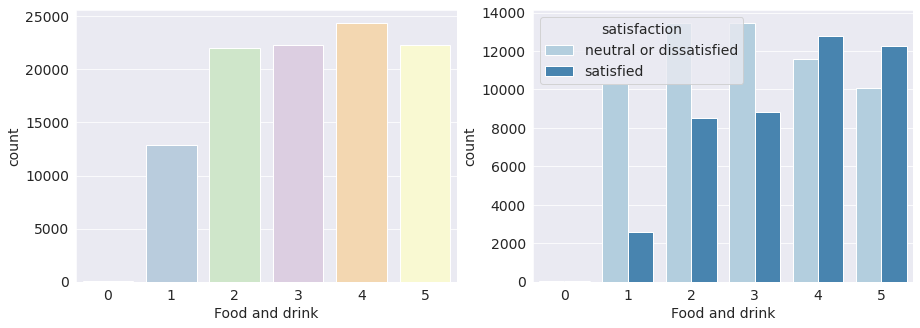

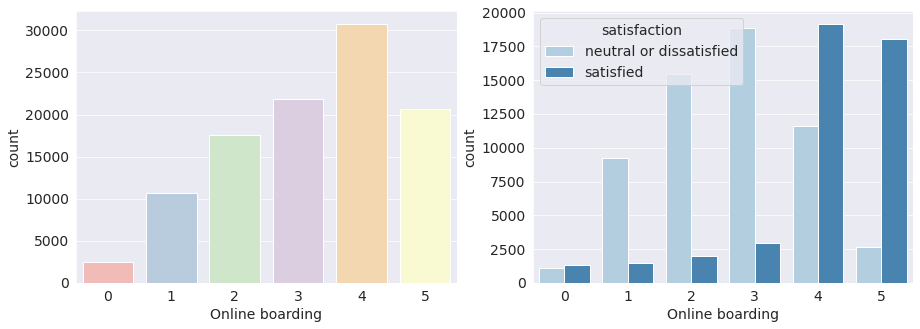

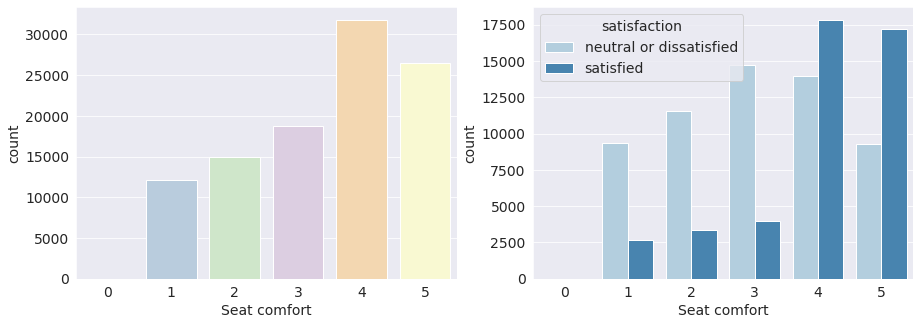

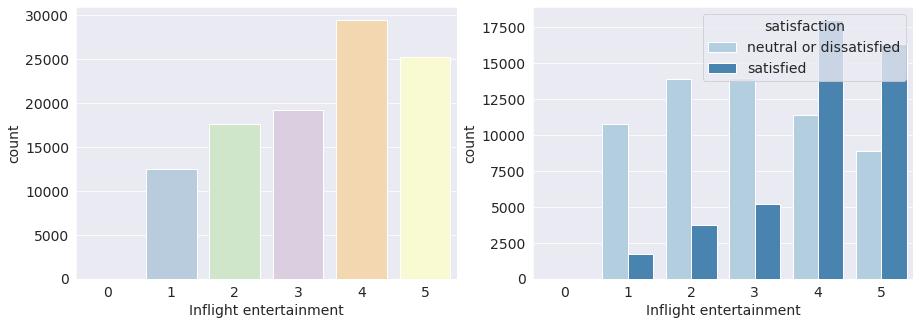

In [33]:
plot_func(4,8)

**6.3 For Next Four Category**

9. On-board service
10. Leg room service
11. Baggage handling
12. Checkin service

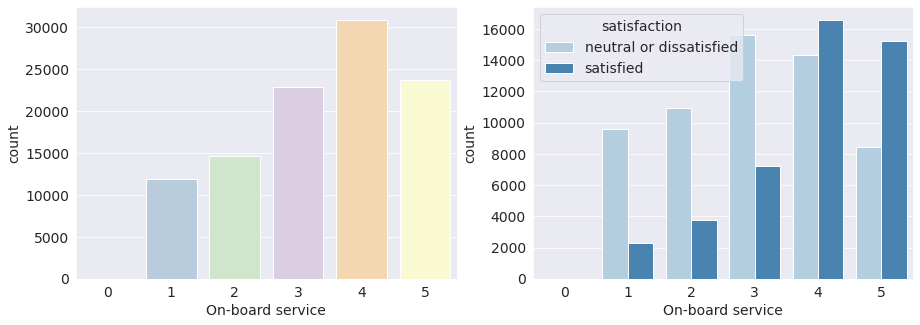

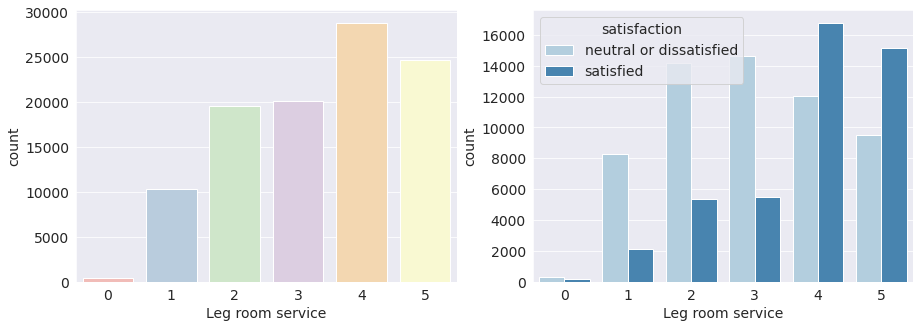

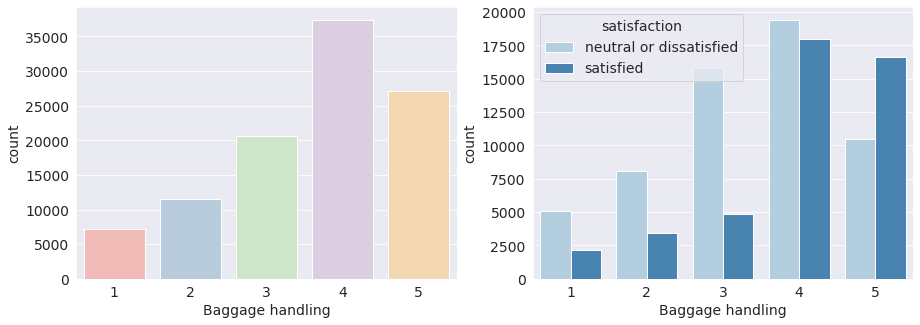

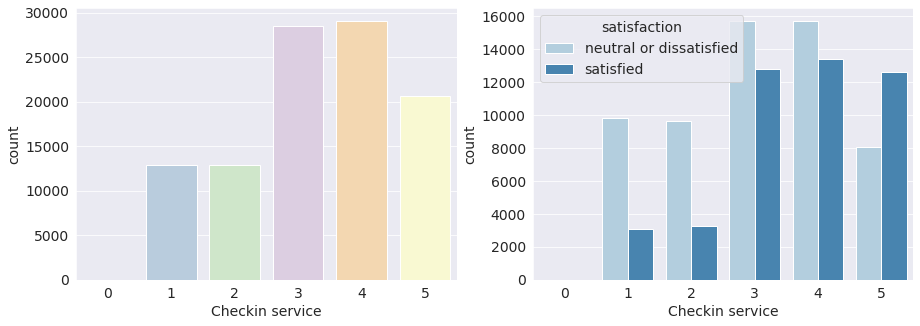

In [34]:
plot_func(8,12)

**6.4 For Last Two Category**

13. Inflight service
14. Cleanliness

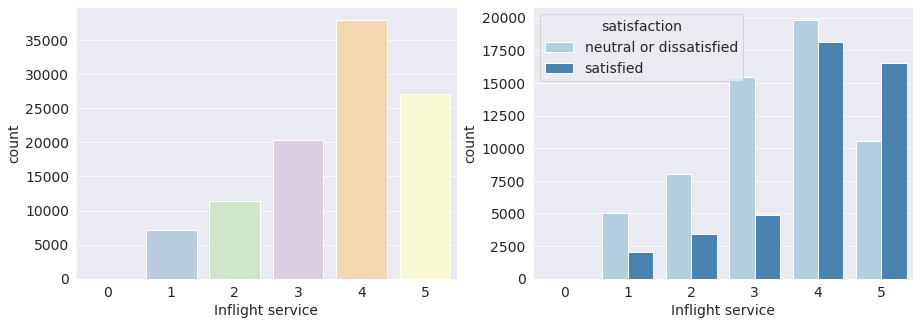

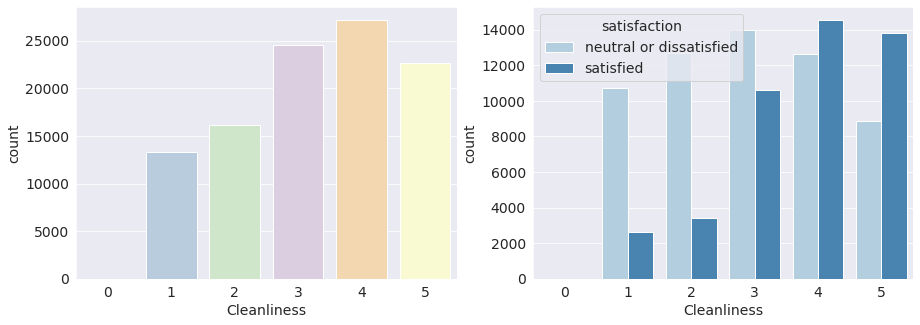

In [35]:
plot_func(12,14)

### 7. Customer Satisfaction variation with respect to Arrival/Departure Delay

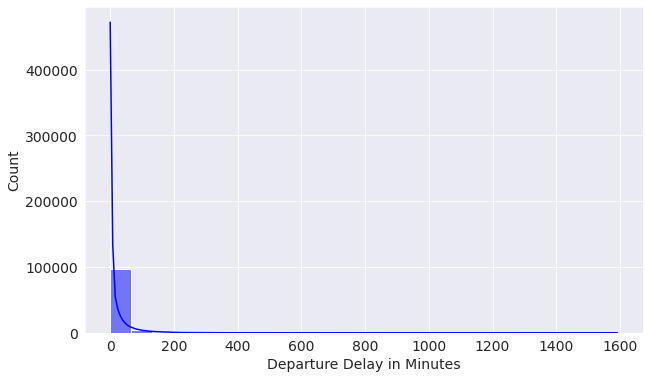

In [36]:
# 7.1 For Departure Delay

sns.histplot(raw_df["Departure Delay in Minutes"], bins=24,kde=True, color="blue");

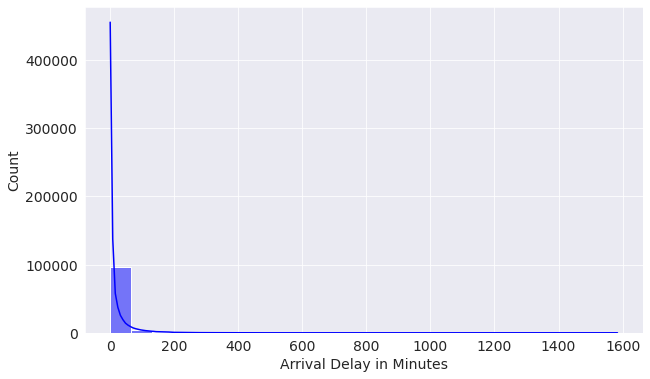

In [37]:
# 7.2 For Arrival Delay

sns.histplot(raw_df["Arrival Delay in Minutes"], bins=24,kde=True, color="blue");

* From the above two graphs we can infer that there a lot of outliers in them, so we have to keep this in mind while imputing for missing values. We also need to normalise the columns so it won't have very high impact on the ML algorithm.

## 4.3 Correlation Overview

Here we'll check for covariance and correlation between the inputs and targets columns. How they are related to each other and have positive or negetive correlation.

Note: Correlation doesn't mean causation.

In [38]:
# We need to convert the traget column into numerical values to see the coorelation or covariance

raw_df["satisfaction"]=raw_df["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})

In [39]:
raw_df.cov()

Unnamed: 0            id           Age  \
Unnamed: 0                         8.996788e+08  3.360618e+06   2170.035191   
id                                 3.360618e+06  1.403537e+09  12943.112173   
Age                                2.170035e+03  1.294311e+04    228.462128   
Flight Distance                    8.357406e+04  3.569241e+06   1499.058384   
Inflight wifi service             -9.918581e+01 -1.058383e+03      0.358438   
Departure/Arrival time convenient  3.381952e+01 -1.205504e+02      0.878840   
Ease of Online booking             8.027372e+01  7.422920e+02      0.525278   
Gate location                      1.944102e+02 -2.899142e+01     -0.025677   
Food and drink                    -8.622612e+01  5.296245e+01      0.462214   
Online boarding                    4.056351e+01  2.804785e+03      4.261898   
Seat comfort                       1.721341e+00  2.614358e+03      3.195591   
Inflight entertainment             5.451145e+01  1.148797e+02      1.540212   
On-board service                   3.141881e+01  2.666289e+03      1.121562   
Leg room service                   1.598854e+02  2.199902e+03      0.807001   
Baggage handling                  -1.864122e+01  3.315451e+03     -0.848365   
Checkin service                   -1.640214e+02  3.758057e+03      0.678651   
Inflight service                  -4.727712e+00  3.494797e+03     -0.878327   
Cleanliness                       -4.396085e+01  1.227359e+03      1.063363   
Departure Delay in Minutes        -5.123769e+01 -2.799464e+04     -5.866554   
Arrival Delay in Minutes          -5.239586e+01 -5.400671e+04     -7.104191   
satisfaction                      -7.031205e+01  2.549752e+02      1.027388   

                                   Flight Distance  Inflight wifi service  \
Unnamed: 0                            8.357406e+04             -99.185813   
id                                    3.569241e+06           -1058.382574   
Age                                   1.499058e+03               0.358438   
Flight Distance                       9.943027e+05               9.442004   
Inflight wifi service                 9.442004e+00               1.763131   
Departure/Arrival time convenient    -3.047976e+01               0.696299   
Ease of Online booking                9.167058e+01               1.329731   
Gate location                         6.106465e+00               0.570433   
Food and drink                        7.555860e+01               0.237829   
Online boarding                       2.891406e+02               0.818853   
Seat comfort                          2.069433e+02               0.214838   
Inflight entertainment                1.711201e+02               0.370495   
On-board service                      1.407063e+02               0.207852   
Leg room service                      1.756774e+02               0.280330   
Baggage handling                      7.440150e+01               0.189612   
Checkin service                       9.220093e+01               0.072574   
Inflight service                      6.745443e+01               0.172408   
Cleanliness                           1.218877e+02               0.231223   
Departure Delay in Minutes            8.226736e+01              -0.883408   
Arrival Delay in Minutes             -9.362198e+01              -0.981232   
satisfaction                          1.476344e+02               0.187030   

                                   Departure/Arrival time convenient  \
Unnamed: 0                                                 33.819519   
id                                                       -120.550406   
Age                                                         0.878840   
Flight Distance                                           -30.479756   
Inflight wifi service                                       0.696299   
Departure/Arrival time convenient                           2.325854   
Ease of Online booking                                      0.932245   
Gate location              

In [40]:
raw_df.corr()

Unnamed: 0        id       Age  \
Unnamed: 0                           1.000000  0.002991  0.004786   
id                                   0.002991  1.000000  0.022857   
Age                                  0.004786  0.022857  1.000000   
Flight Distance                      0.002794  0.095544  0.099461   
Inflight wifi service               -0.002490 -0.021276  0.017859   
Departure/Arrival time convenient    0.000739 -0.002110  0.038125   
Ease of Online booking               0.001913  0.014163  0.024842   
Gate location                        0.005073 -0.000606 -0.001330   
Food and drink                      -0.002162  0.001063  0.023000   
Online boarding                      0.001002  0.055477  0.208939   
Seat comfort                         0.000044  0.052903  0.160277   
Inflight entertainment               0.001363  0.002300  0.076444   
On-board service                     0.000813  0.055241  0.057594   
Leg room service                     0.004052  0.044634  0.040583   
Baggage handling                    -0.000526  0.074940 -0.047529   
Checkin service                     -0.004321  0.079273  0.035482   
Inflight service                    -0.000134  0.079346 -0.049427   
Cleanliness                         -0.001117  0.024965  0.053611   
Departure Delay in Minutes          -0.000045 -0.019546 -0.010152   
Arrival Delay in Minutes            -0.000045 -0.037254 -0.012147   
satisfaction                        -0.004731  0.013734  0.137167   

                                   Flight Distance  Inflight wifi service  \
Unnamed: 0                                0.002794              -0.002490   
id                                        0.095544              -0.021276   
Age                                       0.099461               0.017859   
Flight Distance                           1.000000               0.007131   
Inflight wifi service                     0.007131               1.000000   
Departure/Arrival time convenient        -0.020043               0.343845   
Ease of Online booking                    0.065717               0.715856   
Gate location                             0.004793               0.336248   
Food and drink                            0.056994               0.134718   
Online boarding                           0.214869               0.456970   
Seat comfort                              0.157333               0.122658   
Inflight entertainment                    0.128740               0.209321   
On-board service                          0.109526               0.121500   
Leg room service                          0.133916               0.160473   
Baggage handling                          0.063184               0.120923   
Checkin service                           0.073072               0.043193   
Inflight service                          0.057540               0.110441   
Cleanliness                               0.093149               0.132698   
Departure Delay in Minutes                0.002158              -0.017402   
Arrival Delay in Minutes                 -0.002426              -0.019095   
satisfaction                              0.298780               0.284245   

                                   Departure/Arrival time convenient  \
Unnamed: 0                                                  0.000739   
id                                                         -0.002110   
Age                                                         0.038125   
Flight Distance                                            -0.020043   
Inflight wifi service                                       0.343845   
Departure/Arrival time convenient                           1.000000   
Ease of Online booking                                      0.436961   
Gate location                                               0.444757   
Food and drink                                              0.004906   
Online boarding                                             0.070119   
Seat comfort                 

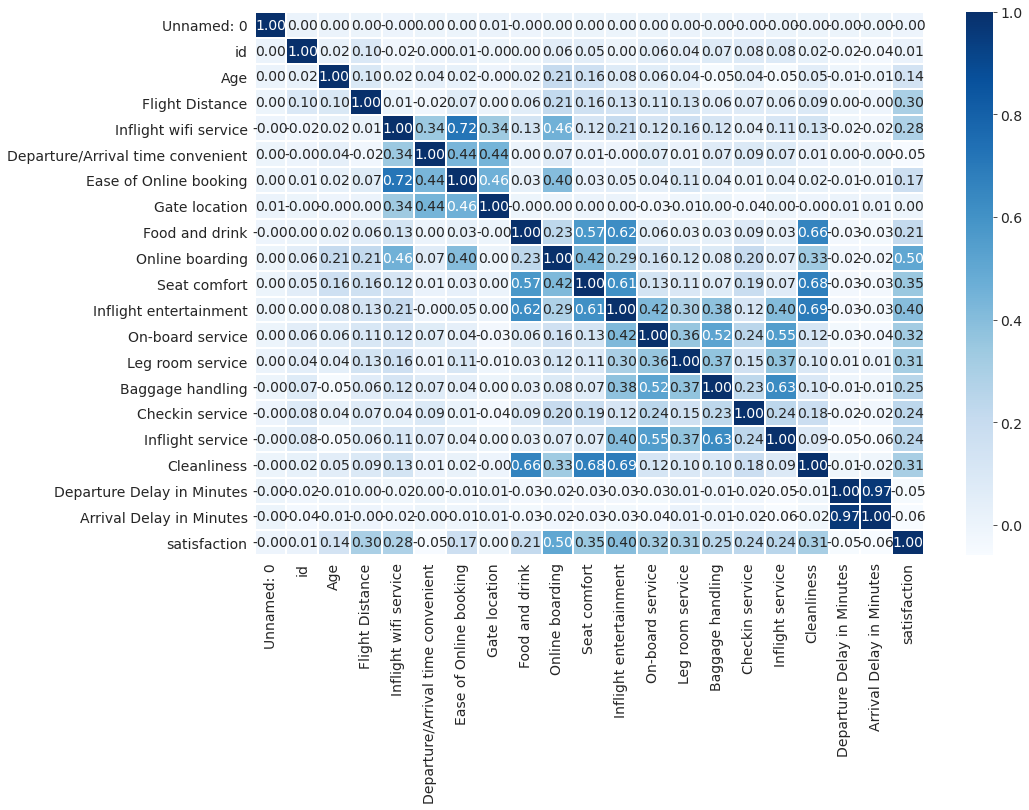

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(raw_df.corr(), annot=True, linewidth=0.2, fmt=".2f", cmap="Blues");

* Here we can see that there is postive correlation between several inputs and target column. Majorly the input columns are showing such positive correlations.

# 5. Data Summarisation

- There are 5 `object` columns while the rest are `float64` or `int64` in type.
- There are more than 100000+ rows of data available from training.
- There are 14 columns which consists of passenger inputs about their service ranging from 1-5 (0: NA).
- These 14 columns show positive correlation with the target columns.
- Some of the continious data contains contains outliers which we need to be careful about.
- The categorial columns in the input shows that most of the passengers are not satisfied or neutral with the service provided which seems a big concern.


# 6. Dataset Preparation

### 6.1 Identify Inputs and Targets

There are total 25 columns in the dataset out of which 23 are useful for us. 


- The first and second columns are `Unnamed: 0` and `id`, ID is a unique ID for each customer and `Unnamed: 0` is an unnecessary index column.  Both aren't useful for training the model and we can remove them.
- The last column `satisfaction` contains the category we need to predict i.e. it's the target column.
- Data from all the other columns (except the first two and the last column) can be used as inputs to the model.

In [42]:
# Our Input Columns

input_cols = list(raw_df.columns)[2:-1]

In [43]:
# Our Target Column 

target_col = 'satisfaction'

In [44]:
print(list(input_cols))

['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [45]:
# Make a new dataframe of inputs column for training

inputs_df = raw_df[input_cols].copy()

In [46]:
# Check the shape of training dataset

inputs_df.shape

(103904, 22)

In [47]:
# Make a new dataframe of target column for training

targets = raw_df[target_col]

In [48]:
# Check the shape of training dataset

targets.shape

(103904,)

In [49]:
# Dataset with relvant columns only

inputs_df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Seat comfort  \
0                       3              1  ...             5   
1                       3              3  ...             1   
2                       2              2  ...             5   
3                       5              5  ...             2   
4                       3              3  ...             5   

   Inflight entertainment  On-board service  Leg room service  \
0                       5                 4                 3   
1                       1                 1                 5   
2                       5                 4                 3   
3                       2                 2                 5   
4                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  
0                          25                      18.0  
1                           1                       6.0  
2                           0                       0.0  
3                          11                       9.0  
4                           0                       0.0  

[5 rows x 22 columns]

### 6.2 Identify Numeric and Categorical Data

Here we have to recognise and seperate numerical and categorical data for proper traetment.

In [50]:
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [51]:
# For Numerical Columns

numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

Here we are going to inlcude `int64` and `float64` type columns only.

In [52]:
# Check numerical columns

numeric_cols

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [53]:
# For Categorical Columns

categorical_cols = inputs_df.select_dtypes(include=['object']).columns.tolist()

Here we are going to inlcude `object` type columns only.

In [54]:
# Check categorical columns

categorical_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [55]:
# Check length of both columns

len(list(categorical_cols)), len(list(numeric_cols))

(4, 18)

### 6.3 Imputing and Scaling Numerical Data

Here we'll make an imputer for numerical column which will add nmerical data from the missing values. Finally we'll scale the data to make it more relavant.

In [56]:
# Categories which contains 0 as Not Applicable

category_value_list = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

As we know that the passenger input has `0` values in the rating which implies not applicable, we have to choose the rows which has such inputs and replace it with `nan` values. After that we can replace the nan values with relevant values we need. 

In [57]:
# helper function to make them nan and then replace it
import numpy as np

def replace_not_applicable(inputs_df):
    for i in category_value_list:
        inputs_df[i].replace(0,np.nan, inplace=True)

In [58]:
replace_not_applicable(inputs_df)

In [59]:
# Check for missing or nan values

missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Departure/Arrival time convenient    5300
Ease of Online booking               4487
Inflight wifi service                3103
Online boarding                      2428
Leg room service                      472
Arrival Delay in Minutes              310
Food and drink                        107
Inflight entertainment                 14
Cleanliness                            12
On-board service                        3
Inflight service                        3
Seat comfort                            1
Gate location                           1
Checkin service                         1
dtype: int64

In [60]:
# Importing Simple Imputer

from sklearn.impute import SimpleImputer

# Performing Simple Imputation
imputer = SimpleImputer(strategy='median')
imputer.fit(raw_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

In [61]:
inputs_df[numeric_cols]

Age  Flight Distance  Inflight wifi service  \
0       13.0            460.0                    3.0   
1       25.0            235.0                    3.0   
2       26.0           1142.0                    2.0   
3       25.0            562.0                    2.0   
4       61.0            214.0                    3.0   
...      ...              ...                    ...   
103899  23.0            192.0                    2.0   
103900  49.0           2347.0                    4.0   
103901  30.0           1995.0                    1.0   
103902  22.0           1000.0                    1.0   
103903  27.0           1723.0                    1.0   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                     4.0                     3.0   
1                                     2.0                     3.0   
2                                     2.0                     2.0   
3                                     5.0                     5.0   
4                                     3.0                     3.0   
...                                   ...                     ...   
103899                                1.0                     2.0   
103900                                4.0                     4.0   
103901                                1.0                     1.0   
103902                                1.0                     1.0   
103903                                3.0                     3.0   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                 1.0             5.0              3.0           5.0   
1                 3.0             1.0              3.0           1.0   
2                 2.0             5.0              5.0           5.0   
3                 5.0             2.0              2.0           2.0   
4                 3.0             4.0              5.0           5.0   
...               ...             ...              ...           ...   
103899            3.0             2.0              2.0           2.0   
103900            4.0             2.0              4.0           5.0   
103901            3.0             4.0              1.0           5.0   
103902            5.0             1.0              1.0           1.0   
103903            3.0             1.0              1.0           1.0   

        Inflight entertainment  On-board service  Leg room service  \
0                          5.0               4.0               3.0   
1                          1.0               1.0               5.0   
2                          5.0               4.0               3.0   
3                          2.0               2.0               5.0   
4                          3.0               3.0               4.0   
...                        ...               ...               ...   
103899                     2.0               3.0               1.0   
103900                     5.0               5.0               5.0   
103901                     4.0               3.0               2.0   
103902                     1.0               4.0               5.0   
103903                     1.0               1.0               1.0   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                    4.0              4.0               5.0          5.0   
1                    3.0              1.0               4.0          1.0   
2                    4.0              4.0               4.0          5.0   
3                    3.0              1.0               4.0          2.0   
4                    4.0              3.0               3.0          3.0   
...                  ...              ...               ...          ...   
103899               4.0              2.0               3.0          2.0   
103900               5.0              5.0               5.0          4.0   
103901               4.0              5.0               5.0          4.0   
103902               1.0              5.0

In [62]:
# Check again for missing values

inputs_df[numeric_cols].isna().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [63]:
# Importing MinMax Scaler

from sklearn.preprocessing import MinMaxScaler

# Performing Scaling
scaler = MinMaxScaler()
scaler.fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [64]:
inputs_df[numeric_cols]

Age  Flight Distance  Inflight wifi service  \
0       0.076923         0.086632                   0.50   
1       0.230769         0.041195                   0.50   
2       0.243590         0.224354                   0.25   
3       0.230769         0.107229                   0.25   
4       0.692308         0.036955                   0.50   
...          ...              ...                    ...   
103899  0.205128         0.032512                   0.25   
103900  0.538462         0.467690                   0.75   
103901  0.294872         0.396607                   0.00   
103902  0.192308         0.195679                   0.00   
103903  0.256410         0.341680                   0.00   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                    0.75                    0.50   
1                                    0.25                    0.50   
2                                    0.25                    0.25   
3                                    1.00                    1.00   
4                                    0.50                    0.50   
...                                   ...                     ...   
103899                               0.00                    0.25   
103900                               0.75                    0.75   
103901                               0.00                    0.00   
103902                               0.00                    0.00   
103903                               0.50                    0.50   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                0.00            1.00             0.50          1.00   
1                0.50            0.00             0.50          0.00   
2                0.25            1.00             1.00          1.00   
3                1.00            0.25             0.25          0.25   
4                0.50            0.75             1.00          1.00   
...               ...             ...              ...           ...   
103899           0.50            0.25             0.25          0.25   
103900           0.75            0.25             0.75          1.00   
103901           0.50            0.75             0.00          1.00   
103902           1.00            0.00             0.00          0.00   
103903           0.50            0.00             0.00          0.00   

        Inflight entertainment  On-board service  Leg room service  \
0                         1.00              0.75              0.50   
1                         0.00              0.00              1.00   
2                         1.00              0.75              0.50   
3                         0.25              0.25              1.00   
4                         0.50              0.50              0.75   
...                        ...               ...               ...   
103899                    0.25              0.50              0.00   
103900                    1.00              1.00              1.00   
103901                    0.75              0.50              0.25   
103902                    0.00              0.75              1.00   
103903                    0.00              0.00              0.00   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                   0.75             0.75              1.00         1.00   
1                   0.50             0.00              0.75         0.00   
2                   0.75             0.75              0.75         1.00   
3                   0.50             0.00              0.75         0.25   
4                   0.75             0.50              0.50         0.50   
...                  ...              ...               ...          ...   
103899              0.75             0.25              0.50         0.25   
103900              1.00             1.00              1.00         0.75   
103901              0.75             1.00              1.00         0.75 

### 6.4 Encoding Categoriacal Data

In [65]:
# Importing One Hot Encoder

from sklearn.preprocessing import OneHotEncoder

# Performing One Hot Encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

In [66]:
inputs_df[encoded_cols]

Gender_Female  Gender_Male  Customer Type_Loyal Customer  \
0                 0.0          1.0                           1.0   
1                 0.0          1.0                           0.0   
2                 1.0          0.0                           1.0   
3                 1.0          0.0                           1.0   
4                 0.0          1.0                           1.0   
...               ...          ...                           ...   
103899            1.0          0.0                           0.0   
103900            0.0          1.0                           1.0   
103901            0.0          1.0                           0.0   
103902            1.0          0.0                           0.0   
103903            0.0          1.0                           1.0   

        Customer Type_disloyal Customer  Type of Travel_Business travel  \
0                                   0.0                             0.0   
1                                   1.0                             1.0   
2                                   0.0                             1.0   
3                                   0.0                             1.0   
4                                   0.0                             1.0   
...                                 ...                             ...   
103899                              1.0                             1.0   
103900                              0.0                             1.0   
103901                              1.0                             1.0   
103902                              1.0                             1.0   
103903                              0.0                             1.0   

        Type of Travel_Personal Travel  Class_Business  Class_Eco  \
0                                  1.0             0.0        0.0   
1                                  0.0             1.0        0.0   
2                                  0.0             1.0        0.0   
3                                  0.0             1.0        0.0   
4                                  0.0             1.0        0.0   
...                                ...             ...        ...   
103899                             0.0             0.0        1.0   
103900                             0.0             1.0        0.0   
103901                             0.0             1.0        0.0   
103902                             0.0             0.0        1.0   
103903                             0.0             1.0        0.0   

        Class_Eco Plus  
0                  1.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
103899             0.0  
103900             0.0  
103901             0.0  
103902             0.0  
103903             0.0  

[103904 rows x 9 columns]

### 6.5 Splitting Train and Validation Set

In [67]:
# Importing  Train Test Split
from sklearn.model_selection import train_test_split

# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

In [68]:
# Checking the size of our splitted data

train_inputs.shape, val_inputs.shape, train_targets.shape, val_targets.shape 

((77928, 27), (25976, 27), (77928,), (25976,))

# 7. Modelling

Now we got our dataset properly preprocessed, splitted into training-validation set and ready for modelling.

First we'll try several differernt Classification Model and then pick out the top three models with the best base score.

Models We'll Try:

1. Logistic Regression
2. Linear SVC
3. K Neighbour Classfier
4. Navie Bayes
5. Decision Tree
6. Random Forest Classfier
7. Ada Boost Classfier
8. XGBoost Classfier

In [69]:
# Importing different models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [70]:
# Make a model list for checking the values

models = {"Logistic Regression": LogisticRegression(),
          "Linear SVC" : LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "GaussianNB" : GaussianNB(),
          "DecisionTree Classifier" : DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "AdaBoostClassifier" : AdaBoostClassifier(),
          "XGB Classifier" : XGBClassifier()}

In [71]:
# Helper function to fit and score all the models.

def fit_and_score(models, train_inputs, val_inputs, train_targets, val_targets):
    """
    Fits and evaluate the given machine learning model.
    models : Any Scikit-learn ML model
    train_inputs : Training Data (No Lables)
    val_inputs : Testing Data (No Lables)
    train_targets : Training Data (Lables)
    val_targets : Testing Data (Labels)
    """
    
    # Make a dictionary to keep the model score
    model_scores = {}
    
    #Loop through models
    for name, model in models.items():
        # Fit the model
        model.fit(train_inputs, train_targets)
        #Evaluate the model
        model_scores[name] = model.score(val_inputs, val_targets)
        
    return model_scores

In [72]:
%%time

# Train all models and saving their score
np.random.seed(42)
model_scores = fit_and_score(models, train_inputs, val_inputs, train_targets, val_targets);

/home/buzzzer/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/buzzzer/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:13:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 1min 8s, sys: 31.4 s, total: 1min 39s
Wall time: 54.1 s


In [73]:
# Checking scores for different models

model_scores

{'Logistic Regression': 0.8852017246689252,
 'Linear SVC': 0.8852402217431475,
 'KNN': 0.9216584539574992,
 'GaussianNB': 0.8518247613181398,
 'DecisionTree Classifier': 0.9269710502001848,
 'Random Forest': 0.9516091777024946,
 'AdaBoostClassifier': 0.9062211271943332,
 'XGB Classifier': 0.9521096396673853}

/home/buzzzer/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



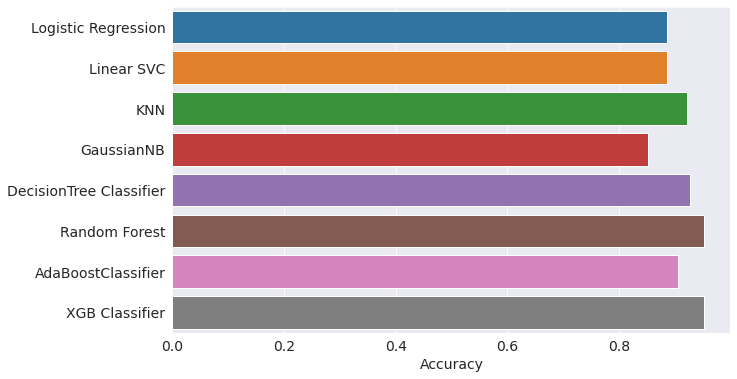

In [74]:
# Plotting bar graph out of the model scores

model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
sns.barplot(model_compare.T['Accuracy'], model_compare.T.index, orient="h", );

In [75]:
# Rearranging the scores

model_compare.T.sort_values(by="Accuracy",ascending=False)

Accuracy
XGB Classifier           0.952110
Random Forest            0.951609
DecisionTree Classifier  0.926971
KNN                      0.921658
AdaBoostClassifier       0.906221
Linear SVC               0.885240
Logistic Regression      0.885202
GaussianNB               0.851825

Here we can see almost all models gives us 85% accuracy on validation set. But as predefined we'll choose the top 3 models with the best scores.

# 7. Experimentation & Evaluation

Here we'll try to see how the accurcay scores is offered by the three models and if we can increase the accurcy score by hyperparameter tuning. Finally we'll see which features are most important for the models.

### Experimentation Criteria

We need to solve these problems if occured

- Reduce Overfitting
- Hyperparameter Tuning
- Regularisation



### Evaluation Criteria

We need to calculate these Evaluation Metrices

1. Confusion Matrix
2. Classification Report
3. ROC Curve and AUC Value
4. Cross Validation
    1. Accuracy
    2. Precision
    3. Recall
    4. F1 Score
    
### Feature Analysis

1. Feature Importance
2. Permutation Importance
3. Advance Shap Method

In [76]:
# Imports for Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Imports for Feature Analysis

from sklearn.inspection import permutation_importance

In [77]:
# Cross Validated Score

from sklearn.model_selection import cross_val_score

# Helper Function 

def cross_score(model,val_inputs,val_targets,model_name):
    
    cv_acc = cross_val_score(model,val_inputs, val_targets, cv=5, scoring="accuracy" )
    cv_pre = cross_val_score(model, val_inputs, val_targets, cv=5, scoring="precision")
    cv_rec = cross_val_score(model, val_inputs, val_targets, cv=5, scoring="recall")
    cv_f1 = cross_val_score(model, val_inputs, val_targets, cv=5, scoring="f1")
    
    cv_values = {"Accuracy": np.mean(cv_acc),
                "Precision": np.mean(cv_pre),
                "Recall": np.mean(cv_pre),
                "F1": np.mean(cv_f1)}

    cv_metrices = pd.DataFrame(cv_values, index=[model_name])

    return cv_metrices

## 7.1 XGB Classifier

In [78]:
%%time

# XGB Model Training and  Score

XGBmodel = XGBClassifier(n_jobs=-1, random_state=42,use_label_encoder=False);
XGBmodel.fit(train_inputs, train_targets);
XGBmodel.score(train_inputs, train_targets);

[12:13:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 8.6 s, sys: 15.7 ms, total: 8.61 s
Wall time: 2.23 s


0.9692280053382609

In [79]:
# XGB Model Score with Validation Set

XGBmodel.score(val_inputs,val_targets)

0.9521096396673853

In [80]:
# Check the parameters used

XGBmodel.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

**Q. Do we need to do hyperparameter tuning or regularisation ?**

No, The base model is offering 95% accuracy which is good enough.

**Q. Does the data seems overfitted ?**

No, The traing score and the validtion score is closeby, so there's no overfiiting situation.

### XGB Classifier Model Evaluation Criteria

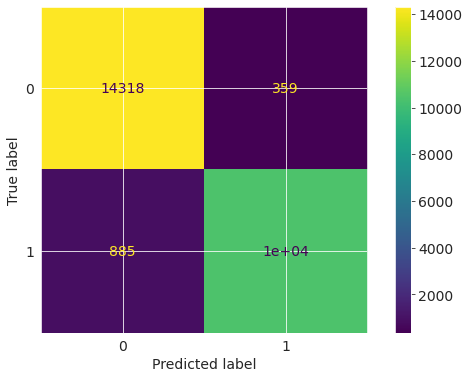

In [81]:
# 1. Confusion Matrix

plot_confusion_matrix(XGBmodel,val_inputs,val_targets);

In [82]:
# Confusion Matrix Percentage

val_predict = XGBmodel.predict(val_inputs)
confusion_matrix(val_targets,val_predict,normalize='true')

array([[0.97553996, 0.02446004],
       [0.07832552, 0.92167448]])

Results: Only 7.8% results are false poitive and 2.4% are false negetive

In [83]:
# 2. Classification Report

val_preds = XGBmodel.predict(val_inputs)
print(classification_report(val_targets,val_preds))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14677
           1       0.97      0.92      0.94     11299

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



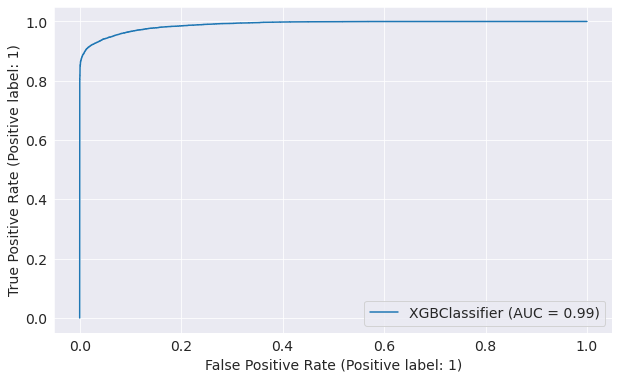

In [84]:
# 3. ROC Curve and AUC Score

plot_roc_curve(XGBmodel,val_inputs,val_targets);

In [85]:
# 4. Cross Validated Score

score_xgb = cross_score(XGBmodel,val_inputs,val_targets,"XGB Model");
score_xgb.T

[12:13:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

XGB Model
Accuracy    0.943448
Precision   0.958259
Recall      0.958259
F1          0.933289

Results: After using a cross validation method we are still getting very good results, that means our model has lerned the data as it needs.

### XGB Classifier Model Feature Analysis

In [86]:
# 1. Inbuilt Feature Importance

feature_xgb = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': XGBmodel.feature_importances_
}).sort_values('importance', ascending=False)

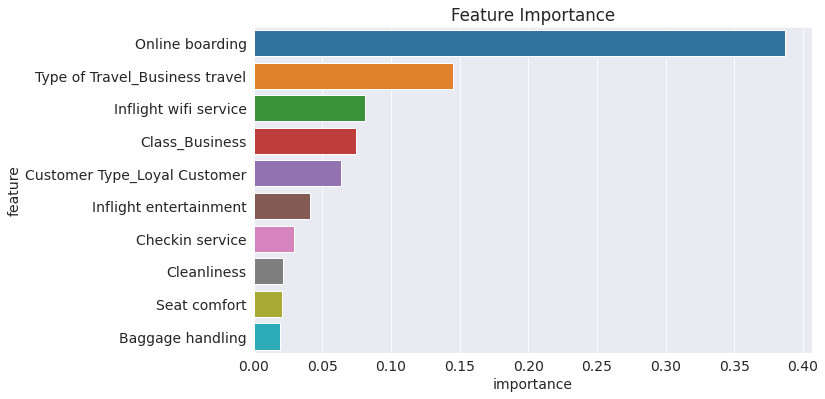

In [87]:
# Visualisation
plt.title('Feature Importance')
sns.barplot(data=feature_xgb.head(10), x='importance', y='feature');

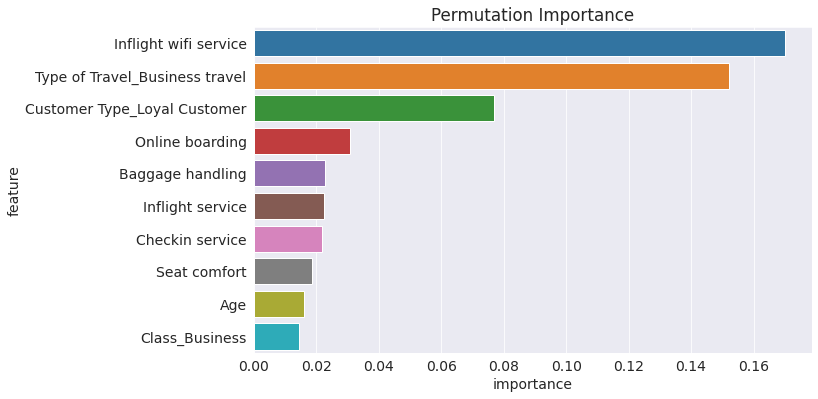

In [88]:
# 2.  Permutation Importance

perm_importance = permutation_importance(XGBmodel, train_inputs,train_targets)

permutation_xgb = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': perm_importance.importances_mean
}).sort_values('importance', ascending=False)

# Visualisation
plt.title('Permutation Importance')
sns.barplot(data=permutation_xgb.head(10), x='importance', y='feature');

## 7.2 Random Forest Classifier

In [89]:
%%time

# Random Forest Classifier Model Training and  Score

RFCmodel = RandomForestClassifier(n_jobs=-1, random_state=42)
RFCmodel.fit(train_inputs, train_targets)
RFCmodel.score(train_inputs, train_targets)

CPU times: user 9.93 s, sys: 62.4 ms, total: 9.99 s
Wall time: 2.64 s


0.9999871676419259

In [90]:
# Random Forest Classifier Model Score on Validation Set

RFCmodel.score(val_inputs,val_targets)

0.9508777332922698

In [91]:
# Check the parameters used

RFCmodel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

**Q. Do we need to do hyperparameter tuning or regularisation ?**

No, The base model is offering 95% accuracy which is good enough.

**Q. Does the data seems overfitted ?**

No, The traing score and the validtion score is closeby, there's no overfiiting situation.

### Random Forest Classifier Model Evaluation Criteria

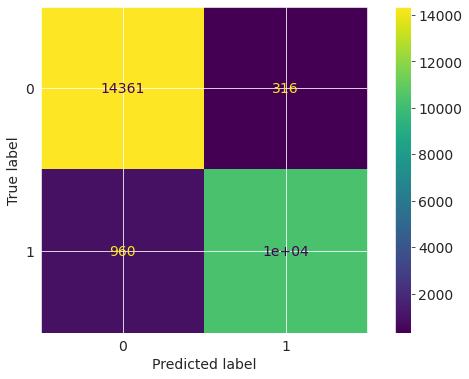

In [92]:
# 1. Confusion Matrix

plot_confusion_matrix(RFCmodel,val_inputs,val_targets);

In [93]:
# Confusion Matrix Percentage

val_predict = RFCmodel.predict(val_inputs)
confusion_matrix(val_targets,val_predict,normalize='true')

array([[0.97846971, 0.02153029],
       [0.08496327, 0.91503673]])

Results: Only 8.4% results are false poitive and 2.1% are false negetive

In [94]:
# 2. Classification Report

val_preds = RFCmodel.predict(val_inputs)
print(classification_report(val_targets,val_preds))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14677
           1       0.97      0.92      0.94     11299

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



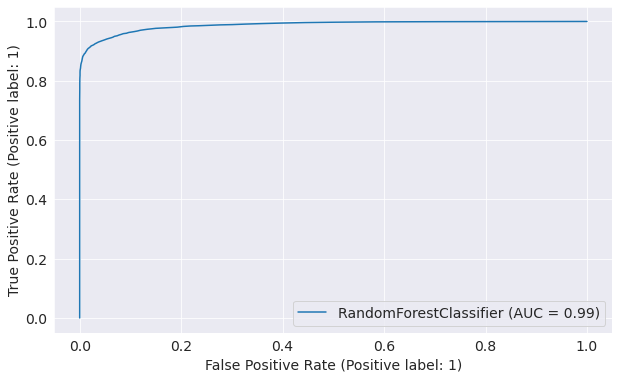

In [95]:
# 3. ROC Curve and AUC Score

plot_roc_curve(RFCmodel,val_inputs,val_targets);

In [96]:
# 4. Cross Validated Score

score_rfc = cross_score(RFCmodel,val_inputs,val_targets,"RFC Model");
score_rfc.T

RFC Model
Accuracy    0.941947
Precision   0.957151
Recall      0.957151
F1          0.931469

### Random Forest Classifier Model Feature Analysis

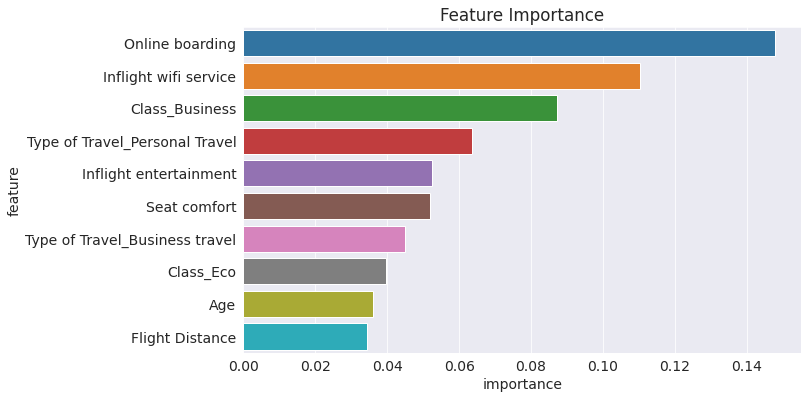

In [97]:
# 1. Inbuilt Feature Importance

feature_rfc = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': RFCmodel.feature_importances_
}).sort_values('importance', ascending=False)

plt.title('Feature Importance')
sns.barplot(data=feature_rfc.head(10), x='importance', y='feature');

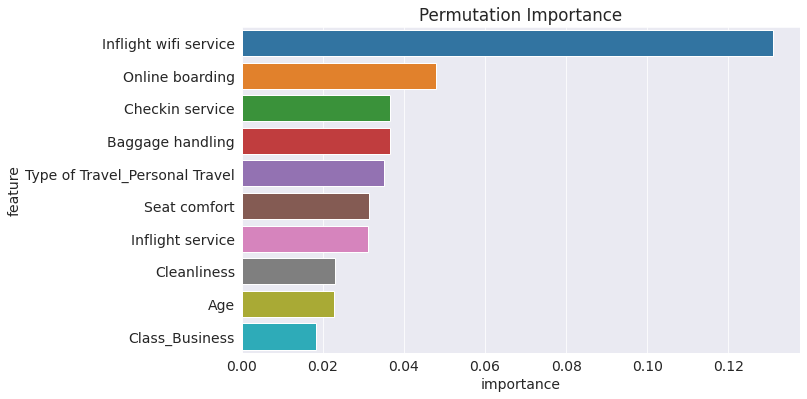

In [98]:
# 2. Permutation Importance

perm_importance = permutation_importance(RFCmodel, train_inputs,train_targets)

permutation_rfc = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': perm_importance.importances_mean
}).sort_values('importance', ascending=False)

# Visualisation
plt.title('Permutation Importance')
sns.barplot(data=permutation_rfc.head(10), x='importance', y='feature');

## 7.3 Decision Tree Classifer Model

In [99]:
%%time

# Decision Tree Classifer Model Training and  Score

DTCmodel = DecisionTreeClassifier(random_state=42)
DTCmodel.fit(train_inputs, train_targets)
DTCmodel.score(train_inputs, train_targets)

CPU times: user 419 ms, sys: 161 µs, total: 419 ms
Wall time: 417 ms


1.0

In [100]:
# Decision Tree Classifer Model Score on Validation Set

DTCmodel.score(val_inputs, val_targets)

0.9290498922081922

In [101]:
# Check the parameters used

DTCmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

**Q. Do we need to do hyperparameter tuning or regularisation ?**

Yes, The base model is offering 92% accuracy which is good enough but we can try to improve it to 95%.

**Q. Does the data seems overfitted ?**

Yes, The traing score is giving 100% accuracy while the validtion score is around 92%, there seems to be an overfiiting situation.

In [102]:
# Helper Functions for Hyperparameter Tuning

def test_paramss(**params):
    model = DecisionTreeClassifier(random_state=42, **params)
    model.fit(train_inputs, train_targets)
    train_acc = accuracy_score(train_targets,model.predict(train_inputs))
    val_acc = accuracy_score(val_targets, model.predict(val_inputs))
    return train_acc, val_acc


def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_acc, val_acc = test_paramss(**params)
        train_errors.append(1-train_acc)
        val_errors.append(1-val_acc)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy Error')
    plt.legend(['Training', 'Validation'])

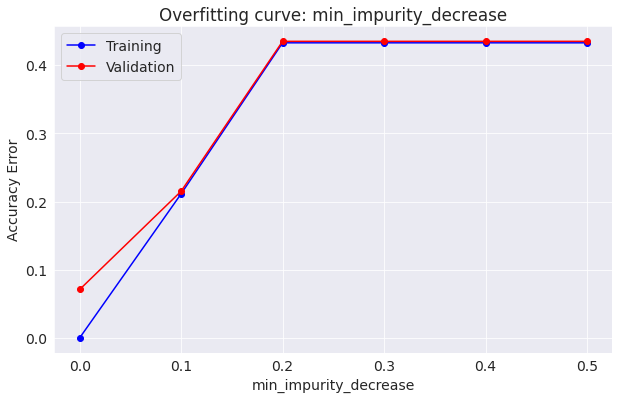

In [103]:
# For Min Impurity Decrease

test_param_and_plot('min_impurity_decrease',[0,0.1,0.2,0.3,0.4,0.5])

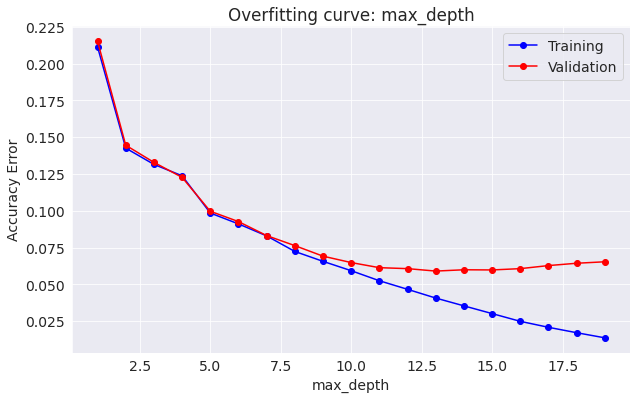

In [104]:
# For Max Depth Parameter

test_param_and_plot('max_depth',range(1,20,1))

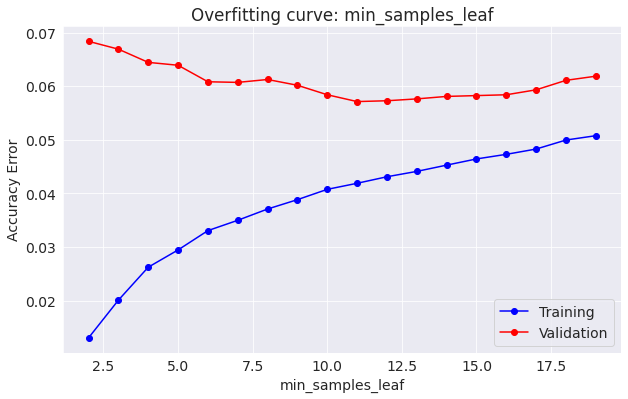

In [105]:
# For Max Iteration Parameter

test_param_and_plot('min_samples_leaf',range(2,20,1))

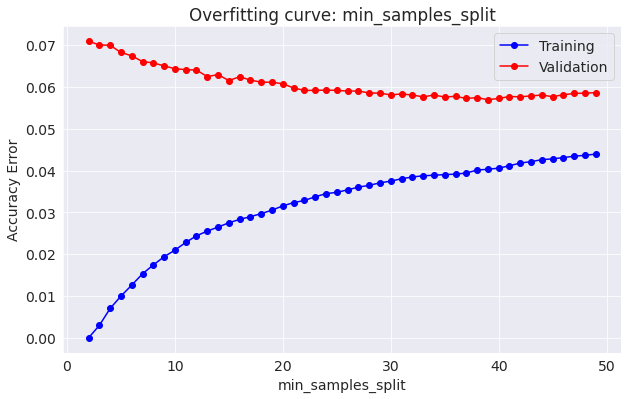

In [106]:
# For Min Samples Split Parameter

test_param_and_plot('min_samples_split',range(2,50,1))

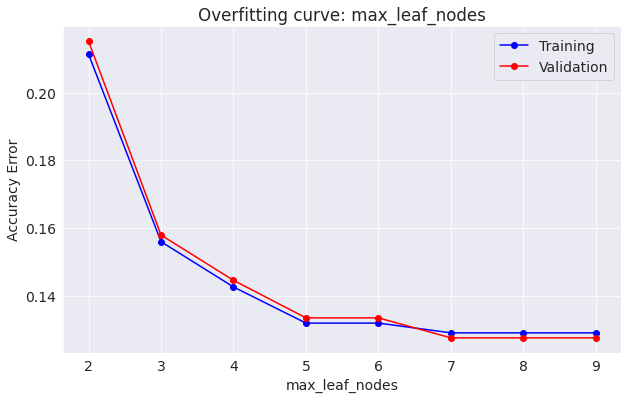

In [107]:
# For Max Leaf Nodes Parameter

test_param_and_plot('max_leaf_nodes',range(2,10,1))

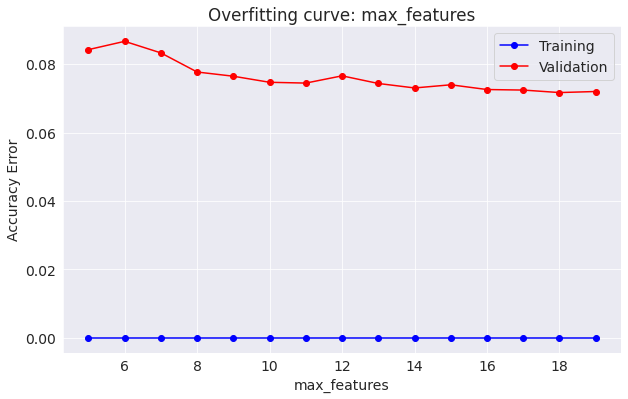

In [108]:
# For Max Features Parameter

test_param_and_plot('max_features',range(5,20,1))

In [109]:
# Model with best found features

model = DecisionTreeClassifier(random_state=42,
                               max_depth=12,
                              min_samples_leaf=3)

model.fit(train_inputs, train_targets)
model.score(train_inputs, train_targets)

0.9516861718509393

In [110]:
model.score(val_inputs, val_targets)

0.9391746227286726

By exploring the different parameters and choosing the right value we are able to go close to 93.9 % accuracy from 92%. It's not up to what we were trying to achieve but its still close to 95%.

### Decision Tree Classifer Model Evaluation 

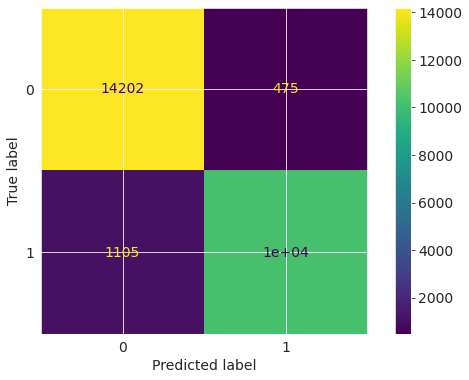

In [111]:
# 1. Confusion Matrix

plot_confusion_matrix(model,val_inputs,val_targets);

In [112]:
# Confusion Matrix Percentage

val_predict = model.predict(val_inputs)
confusion_matrix(val_targets,val_predict,normalize='true')

array([[0.96763644, 0.03236356],
       [0.09779627, 0.90220373]])

Results: Only 9.7% results are false poitive and 3.2% are false negetive

In [113]:
# 2. Classification Report

val_preds = model.predict(val_inputs)
print(classification_report(val_targets,val_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14677
           1       0.96      0.90      0.93     11299

    accuracy                           0.94     25976
   macro avg       0.94      0.93      0.94     25976
weighted avg       0.94      0.94      0.94     25976



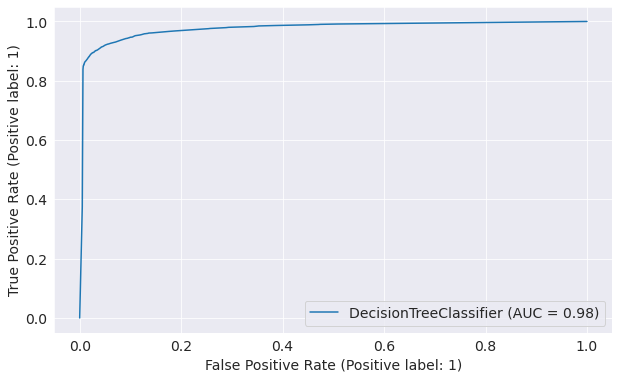

In [114]:
# 3. ROC Curve and AUC Score

plot_roc_curve(model,val_inputs,val_targets);

In [115]:
# 4. Cross Validated Score

score_dtc = cross_score(model,val_inputs,val_targets,"DTC Model");
score_dtc.T

DTC Model
Accuracy    0.924353
Precision   0.928659
Recall      0.928659
F1          0.911436

### Decision Tree Classifer Model Feature Analysis

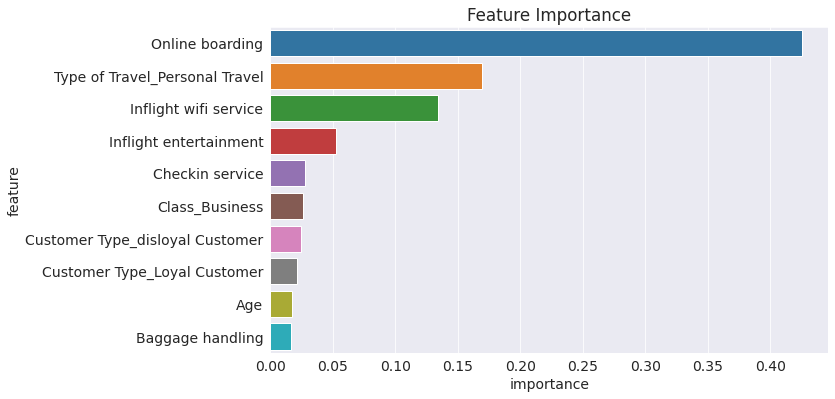

In [116]:
# 1. Inbuilt Feature Importance

feature_dtc = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.title('Feature Importance')
sns.barplot(data=feature_dtc.head(10), x='importance', y='feature');

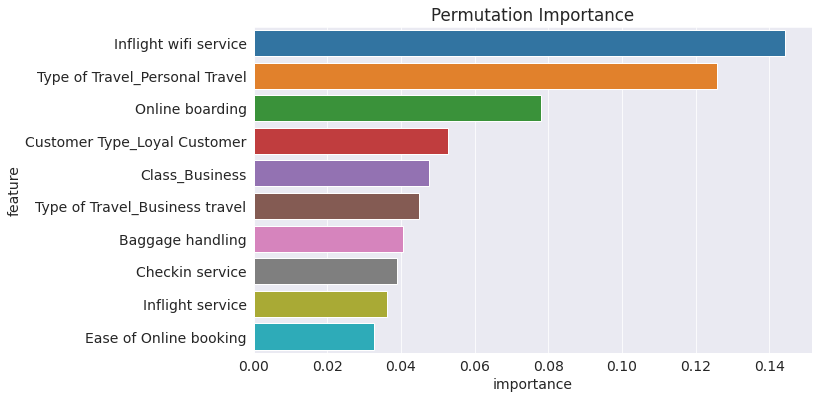

In [117]:
# 2. Permutation Importance

perm_importance = permutation_importance(model, train_inputs,train_targets)

permutation_dtc = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': perm_importance.importances_mean
}).sort_values('importance', ascending=False)

# Visualisation
plt.title('Permutation Importance')
sns.barplot(data=permutation_dtc.head(10), x='importance', y='feature');

In [118]:
# Grid Search if Needed

'''
# Tune Decision Tree

from sklearn.model_selection import GridSearchCV

log_params = {"max_depth": np.arange(1,20,1),
              "min_impurity_decrease": [0,0.1,0.2,0.3,0.4,0.5],
              "min_samples_leaf": np.arange(2,20,1),
              "min_samples_split": np.arange(2,50,1),
              "max_leaf_nodes": np.arange(2,10,1)}

model = GridSearchCV(DecisionTreeClassifier(),
                     param_distributions=log_params,
                     n_iter=100,
                     cv=5);

model.fit(train_inputs, train_targets);
model.score(train_inputs, train_targets)
'''

'\n# Tune Decision Tree\n\nfrom sklearn.model_selection import GridSearchCV\n\nlog_params = {"max_depth": np.arange(1,20,1),\n              "min_impurity_decrease": [0,0.1,0.2,0.3,0.4,0.5],\n              "min_samples_leaf": np.arange(2,20,1),\n              "min_samples_split": np.arange(2,50,1),\n              "max_leaf_nodes": np.arange(2,10,1)}\n\nmodel = GridSearchCV(DecisionTreeClassifier(),\n                     param_distributions=log_params,\n                     n_iter=100,\n                     cv=5);\n\nmodel.fit(train_inputs, train_targets);\nmodel.score(train_inputs, train_targets)\n'

## 7.4 Saving Trained Models

### XGB Classifier

In [119]:
# Importing Joblib Library
import joblib

# Making data for XGB Model
airline_satisfaction_xgb = {
    'model': XGBmodel,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

# Saving the XGBModel
joblib.dump(airline_satisfaction_xgb, 'airline_satisfaction_xgb.joblib')

['airline_satisfaction_xgb.joblib']

### Random Forest Classifier

In [120]:
# Making data for RFC Model
airline_satisfaction_rfc = {
    'model': RFCmodel,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

# Saving the RFCModel
joblib.dump(airline_satisfaction_rfc, 'airline_satisfaction_rfc.joblib')

['airline_satisfaction_rfc.joblib']

### Decision Tree Classifier

In [121]:
# Making data for RFC Model
airline_satisfaction_dtc = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

# Saving the RFCModel
joblib.dump(airline_satisfaction_dtc, 'airline_satisfaction_dtc.joblib')

['airline_satisfaction_dtc.joblib']

In [122]:
## To load the different model

# new_model = joblib.load('airline_satisfaction_xgb.joblib')

# new_model = joblib.load('airline_satisfaction_rfc.joblib')

# new_model = joblib.load('airline_satisfaction_dtc.joblib')

## 7.5 Final Evaluation

In [123]:
# Score of all models

model_compare.T.sort_values(by="Accuracy",ascending=False)

Accuracy
XGB Classifier           0.952110
Random Forest            0.951609
DecisionTree Classifier  0.926971
KNN                      0.921658
AdaBoostClassifier       0.906221
Linear SVC               0.885240
Logistic Regression      0.885202
GaussianNB               0.851825

In [124]:
# Score of Best Three models

final_score_df = pd.concat([score_xgb,score_rfc,score_dtc])
final_score_df

Accuracy  Precision    Recall        F1
XGB Model  0.943448   0.958259  0.958259  0.933289
RFC Model  0.941947   0.957151  0.957151  0.931469
DTC Model  0.924353   0.928659  0.928659  0.911436

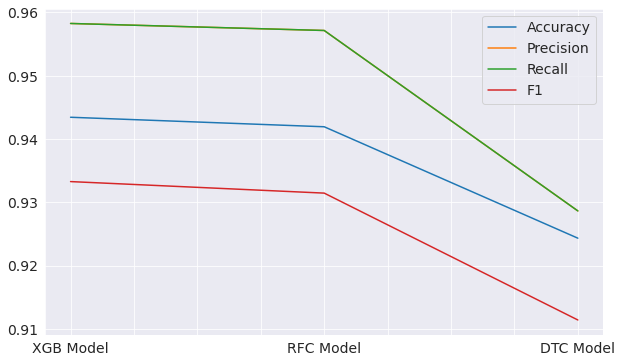

In [125]:
# Visualing The Scores

final_score_df.plot(kind='line');

## 7.6 Putting All in One ( For Prediction )

Here we'll put all we have been used for `test.csv` for Final Prediction

In [126]:
# Basic Imports

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import jovian
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
%matplotlib inline

# Loading Datset
raw_df = pd.read_csv('test.csv')
raw_df["satisfaction"]=raw_df["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})

# Create inputs and targets
input_cols = list(raw_df.columns)[2:-1]
target_col = 'satisfaction'
inputs_df = raw_df[input_cols].copy()
targets = raw_df[target_col]

# Identify numeric and categorical columns
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = inputs_df.select_dtypes(include=['object']).columns.tolist()

# Impute missing numerical values
replace_not_applicable(inputs_df)
imputer = SimpleImputer(strategy='median')
imputer.fit(raw_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

# Scale Numeric Features
scaler = MinMaxScaler()
scaler.fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

# One-Hot Encoding Categorical Features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

# Create testing set
test_inputs = inputs_df[numeric_cols + encoded_cols]
test_targets = targets

In [127]:
# Score with XGB Model
XGBmodel.score(test_inputs,test_targets)

0.9531105635971666

In [128]:
# Score with RFC Model
RFCmodel.score(test_inputs,test_targets)

0.9513781952571605

In [129]:
# Score with DTC Model
model.score(test_inputs,test_targets)

0.9365953187557745

In [130]:
# Prediction with XGB

XGBmodel.predict(test_inputs[:10])

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

# 8. Conclusion & References

### 8.1 Summary

* Here in this machine learning project we tried to train a model which can predict if a custoer mis satisfied with the airline services or not based on the airline passenger satisfaction survey information.


* We trained eight different models but choose top three based on the validation scores:
    1. XG Boost Classification Model gave us 95.2 and 94.3 accuracy score with base and cross validated scoreline.
    2. Random Forest Classification Model gave us 95,1 and 94.1 accuracy score with base and cross validated scoreline.
    3. Decision Tree Classification Model gave us 92.6 and 92.3 accuracy score with base and cross validated scoreline.
    
    
* As we got more than 90% correct values on prediction, we can use it for deployment. For extra boose we can take average of top three models and make an ensembled scores.


* Infomration we found through Exploratory Data Analysis:
    1. we found out that majority of the passengers are unsatisfied/neutral with the airline services. Thats a huge concern for the airline and they needs to upgrade their values and services.
    2. Majority of the loyal passengers are unsatisfied/neutral with the airline services, they also needs to give extra attention to this category.
    3. Majority of Business Travel passengers are satisfied similirly majorlity of Personal Travel passengers seems  unsatisfied.
    4. Majority of Eco and Eco Plus Class passengers seems unsatisfied/neutral with the services.
    5. Most of the columns with passenger inputs shows positive correlation with the satisfation level.
    

* Infomration we found through ML Model Evaluation:
    1. Although all modesl shows different feature impotances few are common in all : Online Boarding, Type of Travel, Inflight Wifi Services, Type of Class and Inflight Entertainment.
    2. Although all modesl shows different permutation impotances few are common in all : Inflihght Wifi Services, Online Boarding, Type of Travel, Customer Type and Baggage Handling.

### 8.2 Limitations

1. The satisfaction feature could have been much better if neutral/unsatisfied were sperate category. The data could have been divided into 3 groups as satisfied, neutral and dissatisfied passengers. This can offer meaningful prediction as it's hard to divide between neutral and unsatisfied passengers.

### 8.3 References and Future Work

* Resources:
    1. `Pandas` : https://pandas.pydata.org/docs/user_guide/index.html
    2. `Seaborn` : https://seaborn.pydata.org/tutorial.html
    3. `Plotly` : https://plotly.com/python/getting-started/
    4. `Feature Importance` : https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e
    5. `Permutation Importance` : https://www.kaggle.com/dansbecker/permutation-importance
    6. `Joblib`: https://joblib.readthedocs.io/en/latest/
    7. `XG Boost` : https://xgboost.readthedocs.io/en/latest/
    
* Future Work:
    * We can use to to deploy online or as an API service for real time use.